In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


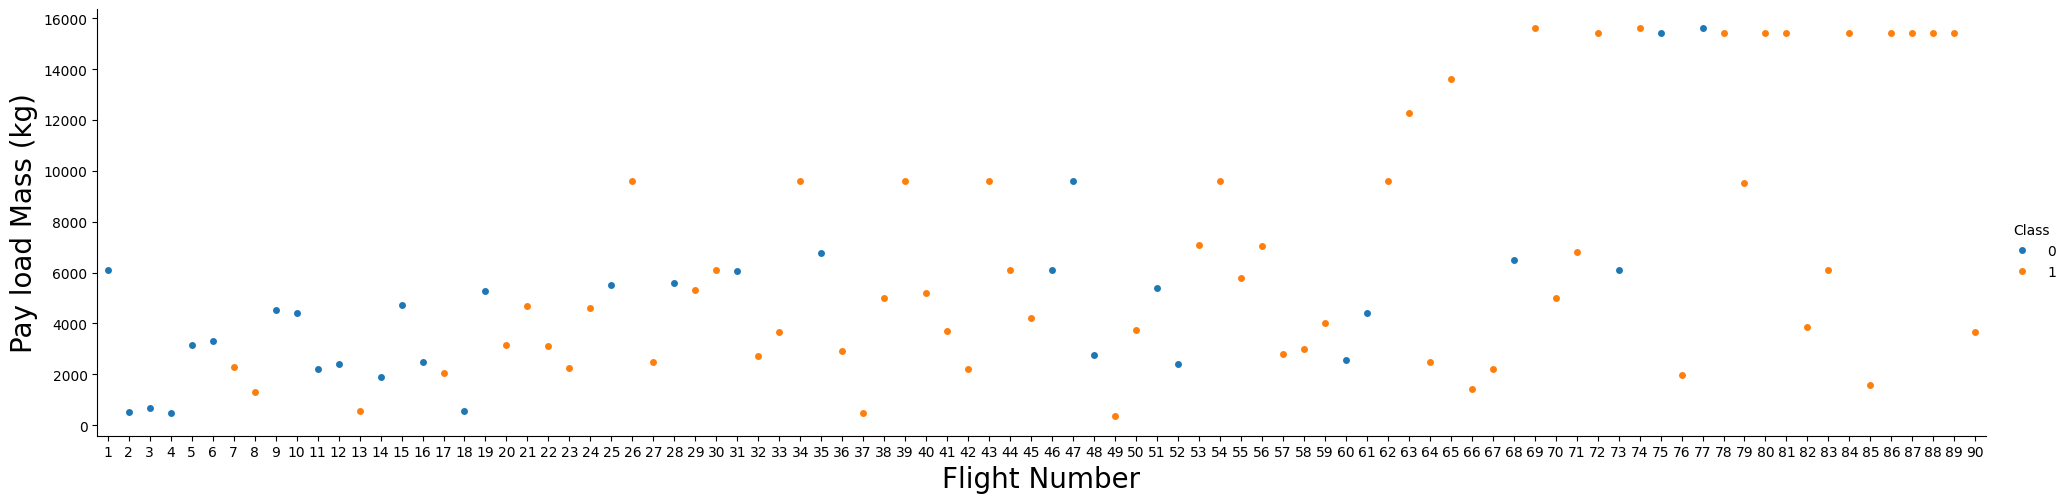

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

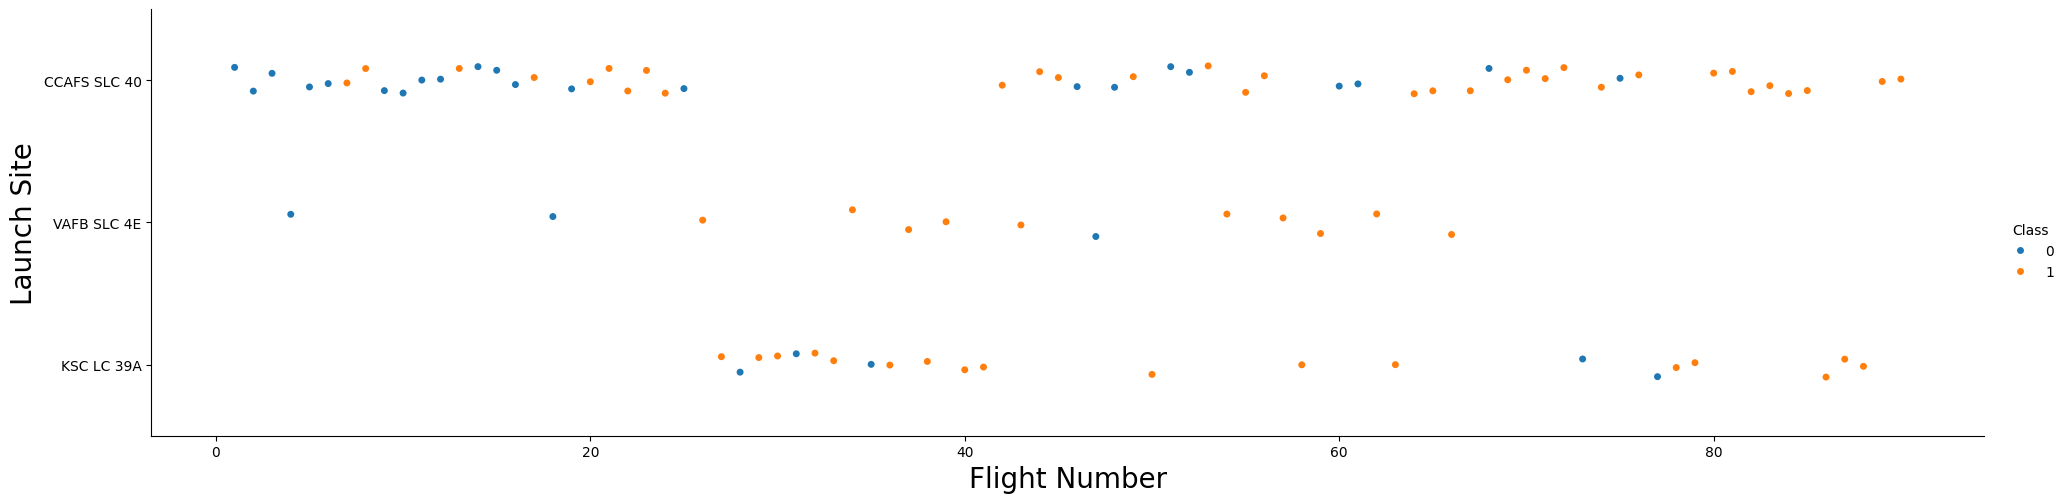

In [8]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

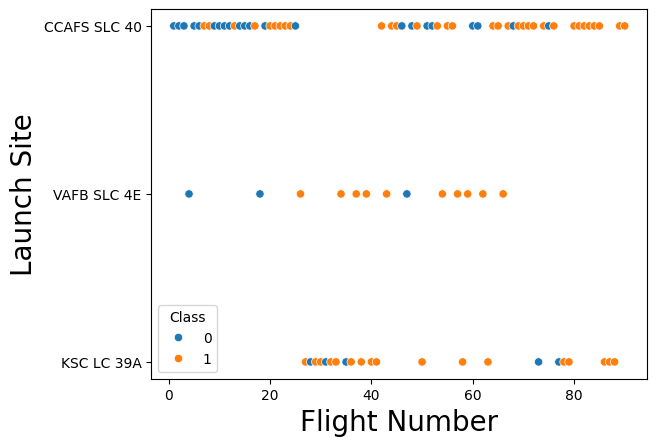

In [15]:
sns.scatterplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

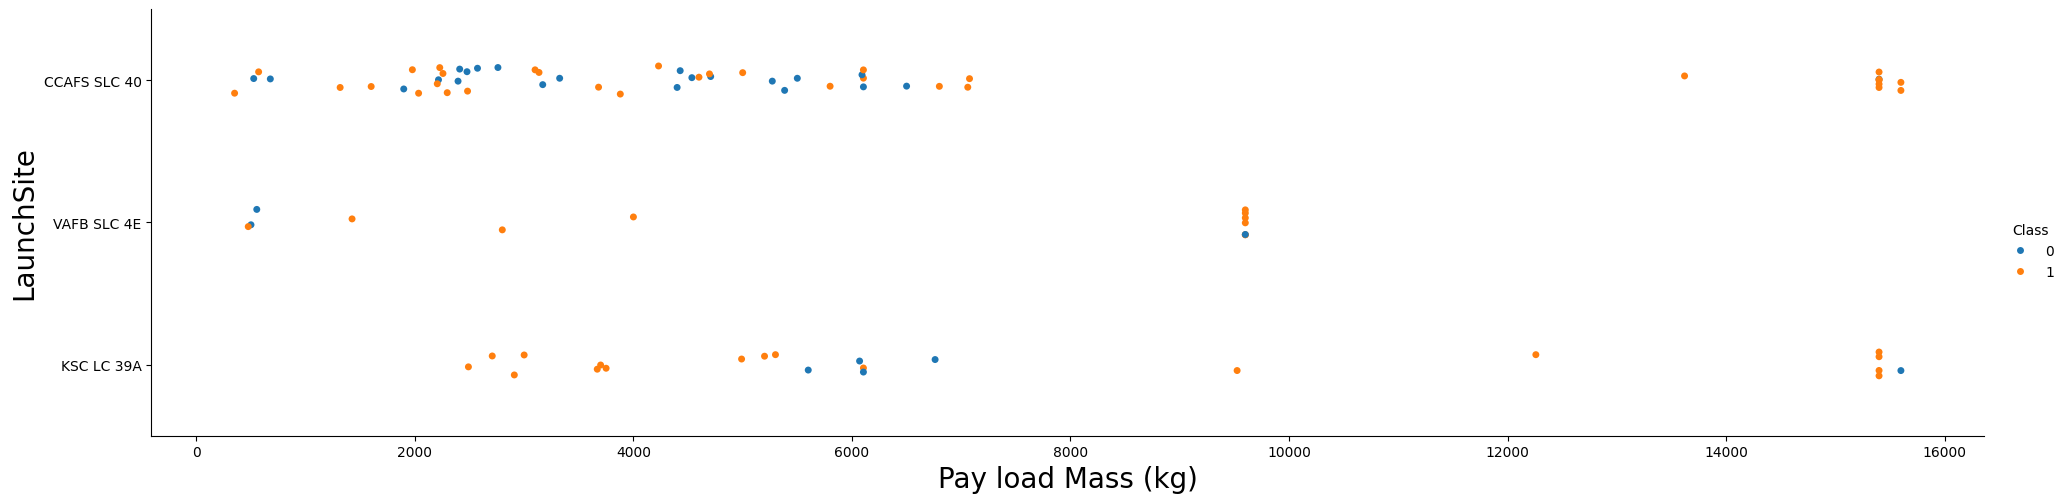

In [37]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=4)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

C:\Users\AlxMa\AppData\Local\Temp\ipykernel_3800\3224319767.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=sub_df, x='Orbit', y='Success_Rate', palette='viridis')


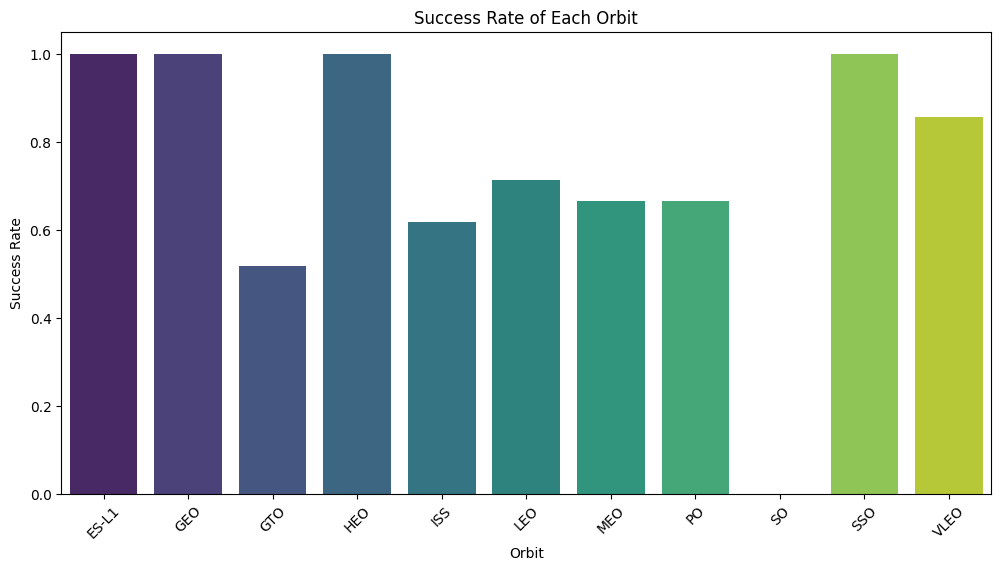

In [31]:
sub_df = df.groupby("Orbit")["Class"].mean().reset_index()

# Renombrar la columna resultante para mayor claridad
sub_df = sub_df.rename(columns={"Class": "Success_Rate"})

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=sub_df, x='Orbit', y='Success_Rate', palette='viridis')

# Añadir título y etiquetas
bar_plot.set_title('Success Rate of Each Orbit')
bar_plot.set_xlabel('Orbit')
bar_plot.set_ylabel('Success Rate')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

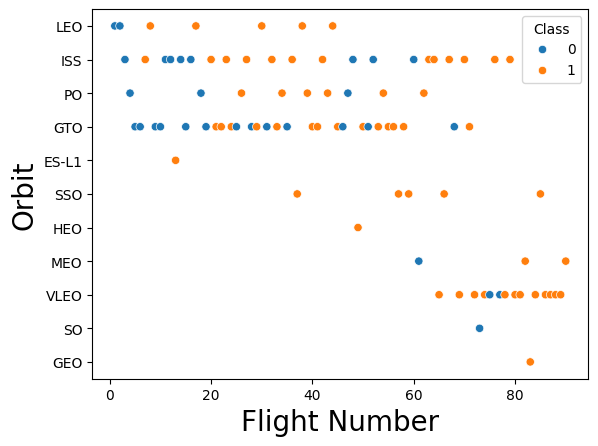

In [36]:
sns.scatterplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

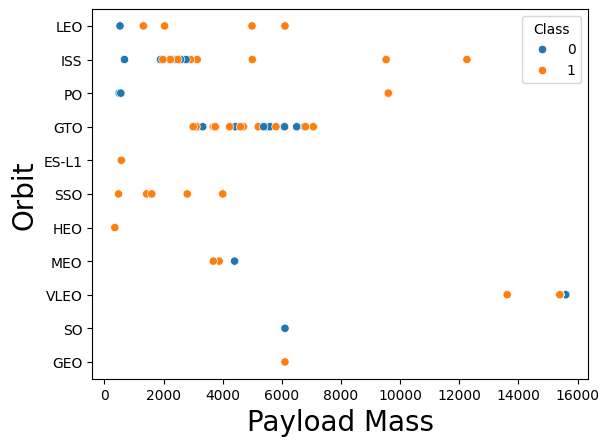

In [38]:
sns.scatterplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [45]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [47]:
sub_df = df.groupby("Date")["Class"].mean().reset_index()

# Renombrar la columna resultante para mayor claridad
sub_df = sub_df.rename(columns={"year": "Success_Rate"})

sub_df.head()

,Date,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


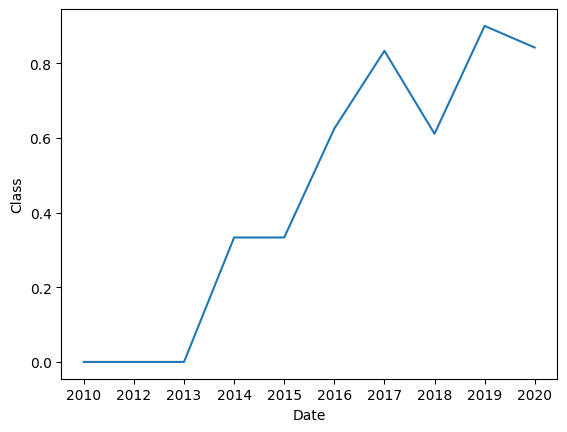

In [49]:
sns.lineplot(y="Class", x="Date", data=sub_df)
plt.show()

In [63]:
# Selecciona las columnas requeridas
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1.0,6104.959412,LEO,CCAFS SLC 40,1.0,False,False,False,NaN,1.0,0,B0003
1,2.0,525.000000,LEO,CCAFS SLC 40,1.0,False,False,False,NaN,1.0,0,B0005
2,3.0,677.000000,ISS,CCAFS SLC 40,1.0,False,False,False,NaN,1.0,0,B0007
3,4.0,500.000000,PO,VAFB SLC 4E,1.0,False,False,False,NaN,1.0,0,B1003
4,5.0,3170.000000,GTO,CCAFS SLC 40,1.0,False,False,False,NaN,1.0,0,B1004


In [65]:
# Aplica OneHotEncoder a las columnas especificadas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.0,525.000000,1.0,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,677.000000,1.0,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,500.000000,1.0,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5.0,3170.000000,1.0,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
# Convierte todas las columnas numéricas a float64
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [67]:
# Guarda el DataFrame resultante en un archivo CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)